In [1]:
import numpy as np
import pandas as pd
import openpyxl
import matplotlib as mp
import matplotlib.pyplot as plt
import sklearn as sl
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Lasso
import xgboost as xg
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import math

In [2]:
AA="C:/Users/ganes/onedrive/Desktop/AI/NCCO2R/NC-Final.xlsx"
df=pd.read_excel(AA)
df.head(5)
df=pd.read_excel(AA)
df.head(5)
df.shape

(477, 22)

In [3]:
X = pd.read_excel(AA, usecols='A:P') 
Y=pd.read_excel(AA, usecols='R')
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X,Y, test_size=0.2, random_state=42)
X.shape
X.head(5)

,Quantum dot,Grahpene,Carbon,CNT,Mesoporous Carbon,Carbon Foam,Pyridinic-N,Pyrrolic-N,Grapitic-N,Quaternary-N,N-Oxide,S,Synthesis Temp,HCO3-,KOH,Potential
0,0.0,0.0,0.0,0.0,0.93,0.0,0.026,0.028,0.016,0.0,0.0,0.0,973,0.1,0,-0.40
1,0.0,0.0,0.0,0.0,0.93,0.0,0.026,0.028,0.016,0.0,0.0,0.0,973,0.1,0,-0.50
2,0.0,0.0,0.0,0.0,0.93,0.0,0.026,0.028,0.016,0.0,0.0,0.0,973,0.1,0,-0.56
3,0.0,0.0,0.0,0.0,0.93,0.0,0.026,0.028,0.016,0.0,0.0,0.0,973,0.1,0,-0.60
4,0.0,0.0,0.0,0.0,0.93,0.0,0.026,0.028,0.016,0.0,0.0,0.0,973,0.1,0,-0.70


In [4]:
Y.head(5)

,CO
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.666667


In [5]:
import seaborn as sns

4.021581414056805
10.116023401992429
0.9758790045980551
0.8460600773733218
RandomForestRegressor(criterion='poisson', max_features=0.5, n_estimators=344,
                      random_state=42)


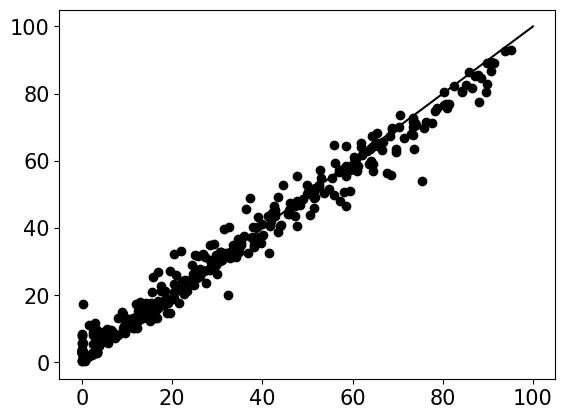

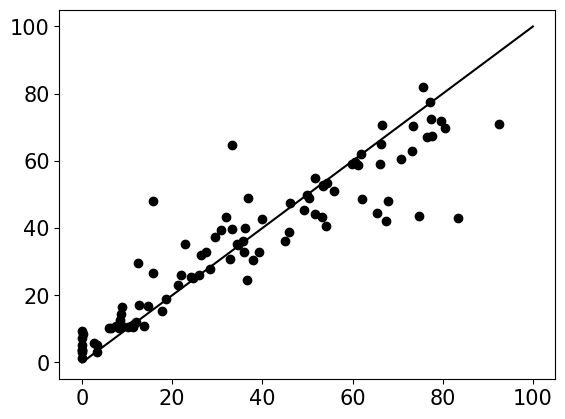

In [207]:
import math 
hyper_params_rdf = {'n_estimators':np.arange(1, 400, 1),} 
                    
np.random.seed(22)
RF=RandomForestRegressor(random_state=42, criterion="poisson", max_features=0.5)
g_search_RF = RandomizedSearchCV(RF, hyper_params_rdf, cv=10, n_jobs=-1, )
rf_model=g_search_RF.fit(X_Train,Y_Train.values.ravel())
predict_rf_train=g_search_RF.predict(X_Train)
predict_rf_test=g_search_RF.predict(X_Test)
mse_rf_test = mean_squared_error(Y_Test, predict_rf_test)
mse_rf_train = mean_squared_error(Y_Train,predict_rf_train)
print(math.sqrt(mse_rf_train))
print(math.sqrt(mse_rf_test))
r2_rf_train = r2_score(Y_Train, predict_rf_train)
r2_rf_test = r2_score(Y_Test, predict_rf_test)
print( r2_rf_train)
print(r2_rf_test)
print(g_search_RF.best_estimator_)
plt.scatter(Y_Train, predict_rf_train, marker='o', alpha=1, color="black")
plt.plot([-0, 100], [-0, 100], color="black")
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15)
plt.show()
plt.scatter(Y_Test, predict_rf_test, marker='o', alpha=1, color="black")
plt.plot([-0, 100], [-0, 100], color="black")
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15)
plt.show()

3.4595660666360786
10.197870597647817
0.9821497201919556
0.8435590267181396
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.04, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=318, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)


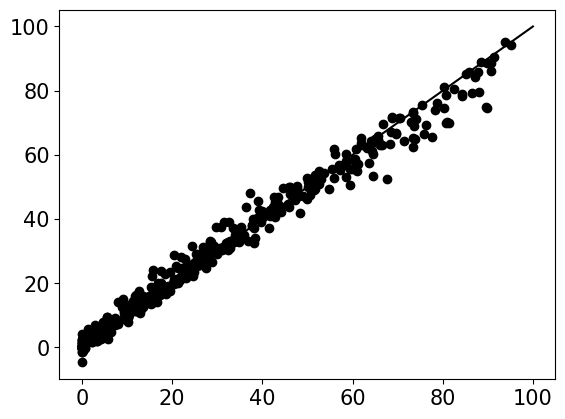

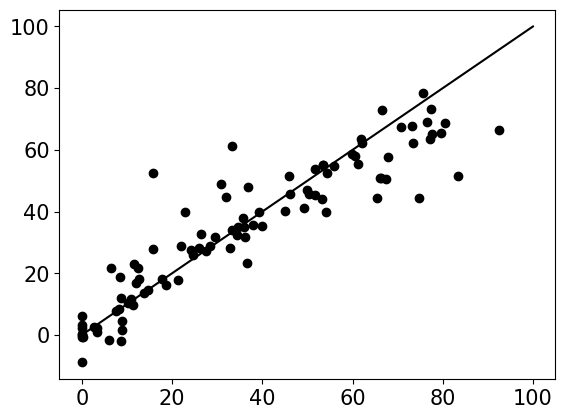

In [208]:
hyper_params_xgb = {'n_estimators':np.arange(1, 350, 1), 
                   }                  
np.random.seed(22)
xgb=xg.XGBRegressor(random_state=42, max_depth=5, learning_rate=0.04,  )
g_search_xgb = RandomizedSearchCV(xgb, hyper_params_xgb, cv=10, n_jobs=-1)
g_search_xgb.fit(X_Train, Y_Train.values.ravel());
predict_xg_train = g_search_xgb.predict(X_Train)
predict_xg_test = g_search_xgb.predict(X_Test)
mse_xg_test = mean_squared_error(Y_Test,predict_xg_test)
mse_xg_train = mean_squared_error(Y_Train,predict_xg_train)
print(math.sqrt(mse_xg_train))
print(math.sqrt(mse_xg_test))
r2_xg_train = r2_score(Y_Train,predict_xg_train)
r2_xg_test = r2_score(Y_Test,predict_xg_test)
print(r2_xg_train)
print(r2_xg_test)
print(g_search_xgb.best_estimator_)
plt.scatter(Y_Train,predict_xg_train, marker='o', alpha=1, color="black")
plt.plot([-0, 100], [-0, 100], color="black")
plt.show()
plt.scatter(Y_Test,predict_xg_test, marker='o', alpha=1, color="black")
plt.plot([-0, 100], [-0, 100], color="black")
plt.show()

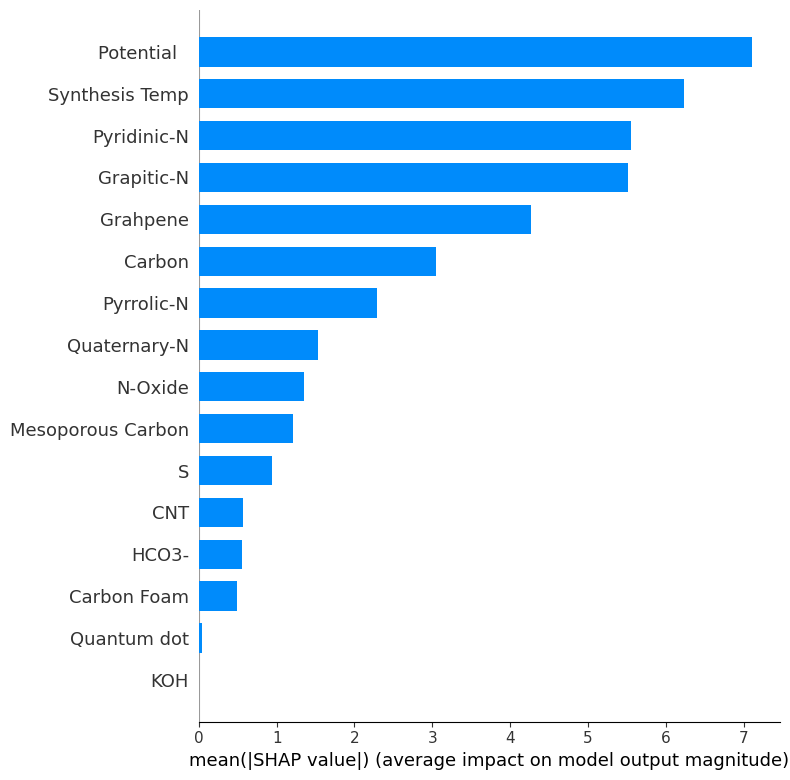

In [209]:
import shap
xgb=xg.XGBRegressor(random_state=42, max_depth=3, colsample_bytree=0.6, min_child_weight=6, subsample=0.4, learning_rate=0.05, n_estimators=344)
xgb.fit(X_Train, Y_Train);
explainer = shap.TreeExplainer(xgb, X_Train)
shap_values_XGB = explainer.shap_values(X_Train)
shap.summary_plot(shap_values_XGB, X_Train, plot_type='bar')

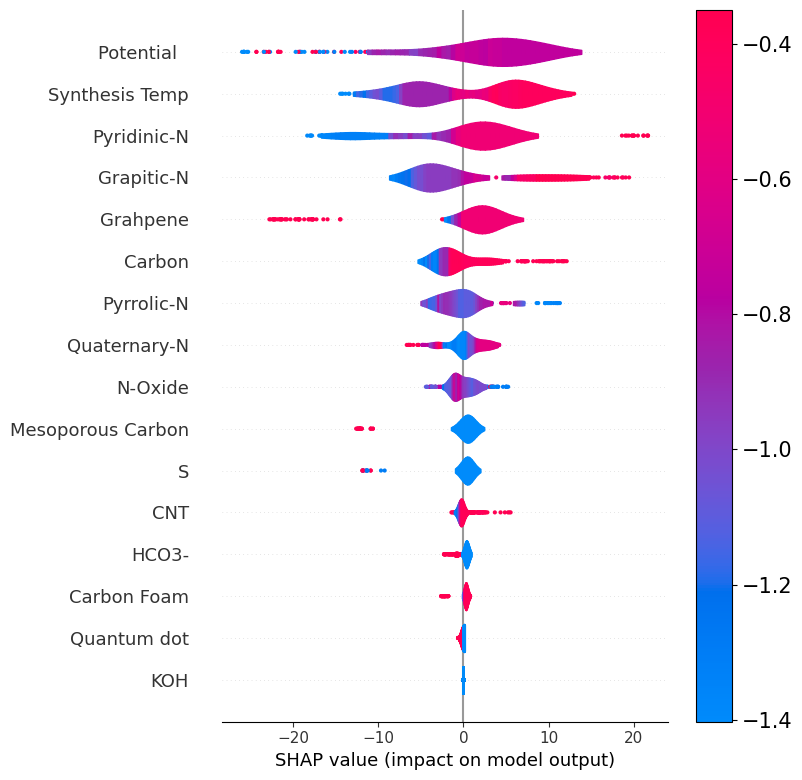

In [210]:
shap.summary_plot(shap_values_XGB, X_Train, show = False, color_bar = False, plot_type="violin")
plt.colorbar()
plt.show()

4.7794639351675094
10.350322265112043
0.9659309617866244
0.8388466427607657
GradientBoostingRegressor(learning_rate=0.15, n_estimators=185, random_state=1)


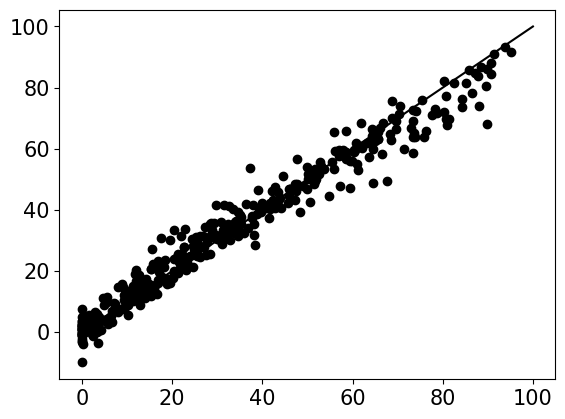

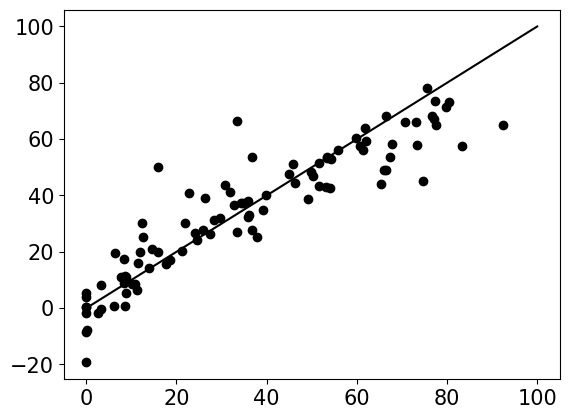

In [215]:
hyper_params_GBR = {"n_estimators":np.arange(1, 200, 1),}
np.random.seed(22)
GB= GradientBoostingRegressor(random_state=1, learning_rate=0.15   )
g_search_GB = RandomizedSearchCV(GB, hyper_params_GBR, cv=10, n_jobs=-1)
g_search_GB.fit(X_Train, Y_Train.values.ravel());
predict_GB_train = g_search_GB.predict(X_Train)
predict_GB_test = g_search_GB.predict(X_Test)
mse_GB_test = mean_squared_error(Y_Test,predict_GB_test)
mse_GB_train = mean_squared_error(Y_Train,predict_GB_train)
print(math.sqrt(mse_GB_train))
print(math.sqrt(mse_GB_test))
r2_GB_train = r2_score(Y_Train,predict_GB_train)
r2_GB_test = r2_score(Y_Test,predict_GB_test)
print(r2_GB_train)
print(r2_GB_test)
print(g_search_GB.best_estimator_)
plt.scatter(Y_Train,predict_GB_train, marker='o', alpha=1, color="black")
plt.plot([-0, 100], [-0, 100], color="black")
plt.show()
plt.scatter(Y_Test,predict_GB_test, marker='o', alpha=1, color="black")
plt.plot([-0, 100], [-0, 100], color="black")
plt.show()

In [ ]:
hyper_params_etg = {'n_estimators':np.arange(1, 400, 1),}
np.random.seed(22)
etg_tune = ExtraTreesRegressor(random_state=42, min_samples_leaf=1, )
g_search_etg = RandomizedSearchCV(etg_tune, hyper_params_etg, cv=10, n_jobs=-1)
g_search_etg.fit(X_Train, Y_Train.values.ravel());
predict_etg_train = g_search_etg.predict(X_Train)
predict_etg_test = g_search_etg.predict(X_Test)
mse_etg_test = mean_squared_error(Y_Test,predict_etg_test)
mse_etg_train = mean_squared_error(Y_Train,predict_etg_train)
print(math.sqrt(mse_etg_train))
print(math.sqrt(mse_etg_test))
r2_etg_train = r2_score(Y_Train,predict_etg_train)
r2_etg_test = r2_score(Y_Test,predict_etg_test)
print(r2_etg_train)
print(r2_etg_test)
print(g_search_etg.best_estimator_)
plt.scatter(Y_Train, predict_etg_train, marker='o', alpha=1, color="black")
plt.plot([-0, 100], [-0, 100], color="black")
plt.show()
plt.scatter(Y_Test,predict_etg_test, marker='o', alpha=1, color="black")
plt.plot([-0, 100], [-0, 100], color="black")
plt.show()

4.807542838620855
17.332048278728234
0.9655294810859087
0.5481113915645106
DecisionTreeRegressor(max_depth=19, min_samples_split=4, random_state=1)


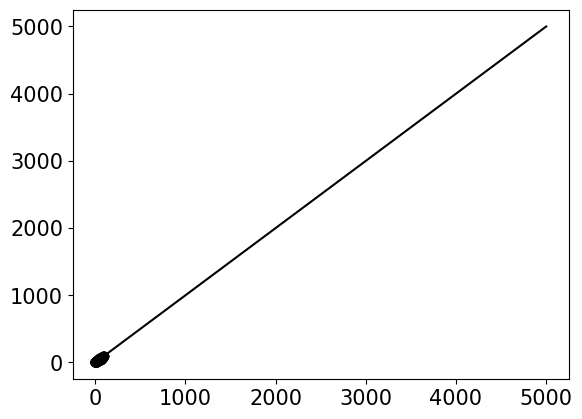

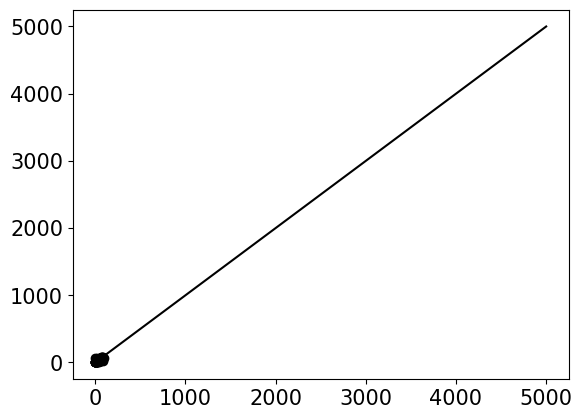

In [41]:
hyper_params_DT = {"min_samples_split":np.arange(2,20,1),
                    "max_depth":np.arange(1,20,1), }
np.random.seed(22)
DT= DecisionTreeRegressor(random_state=1 )
g_search_DT = RandomizedSearchCV(DT, hyper_params_DT, cv=10, n_jobs=-1)
g_search_DT.fit(X_Train, Y_Train);
predict_DT_train = g_search_DT.predict(X_Train)
predict_DT_test = g_search_DT.predict(X_Test)
mse_DT_test = mean_squared_error(Y_Test,predict_DT_test)
mse_DT_train = mean_squared_error(Y_Train,predict_DT_train)
print(math.sqrt(mse_DT_train))
print(math.sqrt(mse_DT_test))
r2_DT_train = r2_score(Y_Train,predict_DT_train)
r2_DT_test = r2_score(Y_Test,predict_DT_test)
print(r2_DT_train)
print(r2_DT_test)
print(g_search_DT.best_estimator_)
plt.scatter(Y_Train, predict_DT_train, marker='o', alpha=1, color="black")
plt.plot([-0, 5000], [-0, 5000], color="black")
plt.show()
plt.scatter(Y_Test,predict_DT_test, marker='o', alpha=1, color="black")
plt.plot([-0, 5000], [-0, 5000], color="black")
plt.show()
